In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import StringIO
from bs4 import BeautifulSoup

In [2]:
rev = pd.read_csv("genshinRev.csv")
df = pd.read_csv("genshinChar.csv")
five = pd.read_csv("fiveStarChar.csv")
ab = pd.read_csv("Genshin Abyss.csv")

In [3]:
rev.head()

,version,version_name,start_date,end_date,5_star_characters,rerun,mixed,revenue,banner_days
0,1.0,Welcome to Tevyat,2020-09-25,2020-10-19,Venti,N,N,30632752,24
1,1.0,Welcome to Tevyat,2020-10-20,2020-11-10,Klee,N,N,22750080,21
2,1.1,A New Star Approaches,2020-11-11,2020-12-01,Tartaglia,N,N,13443619,20
3,1.1,A New Star Approaches,2020-12-01,2020-12-22,Zhongli,N,N,16264892,21
4,1.2,The Chalk Prince and the Dragon,2020-12-23,2021-01-12,Albedo,N,N,11816107,20


In [4]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   version            53 non-null     float64
 1   version_name       53 non-null     object 
 2   start_date         53 non-null     object 
 3   end_date           53 non-null     object 
 4   5_star_characters  53 non-null     object 
 5   rerun              53 non-null     object 
 6   mixed              53 non-null     object 
 7   revenue            53 non-null     int64  
 8   banner_days        53 non-null     int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 3.9+ KB


In [5]:
df.head()

,character_name,rarity,region,vision,weapon_type,model,constellation,birthday,special_dish,affiliation,...,hp_1_20,atk_1_20,def_1_20,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
0,Albedo,5,Mondstadt,Geo,Sword,Medium Male,Princeps Cretaceus,13-Sep,Woodland Dream,Knights of Favonius,...,1030,20,68,0.0,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
1,Alhaitham,5,Sumeru,Dendro,Sword,Tall Male,Vultur Volans,11-Feb,Ideal Circumstance,Sumeru Akademiya,...,1039,24,60,0.0,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
2,Aloy,5,NaN,Cryo,Bow,Medium Female,Nora Fortis,4-Apr,Satiety Gel,Wandering Heroine,...,848,18,53,0.0,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
3,Amber,4,Mondstadt,Pyro,Bow,Medium Female,Lepus,10-Aug,Outrider's Champion Steak!,Knights of Favonius,...,793,19,50,0.0,0.00%,6.00%,12.00%,12.00%,18.00%,24.00%
4,Arataki Itto,5,Inazuma,Geo,Claymore,Tall Male,Taurus Iracundus,1-Jun,Way of the Strong,Arataki Gang,...,1001,18,75,0.0,0.00%,4.80%,9.60%,9.60%,14.40%,19.20%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   character_name       72 non-null     object 
 1   rarity               72 non-null     int64  
 2   region               69 non-null     object 
 3   vision               70 non-null     object 
 4   weapon_type          72 non-null     object 
 5   model                72 non-null     object 
 6   constellation        72 non-null     object 
 7   birthday             72 non-null     object 
 8   special_dish         69 non-null     object 
 9   affiliation          69 non-null     object 
 10  voice_eng            72 non-null     object 
 11  voice_cn             72 non-null     object 
 12  voice_jp             72 non-null     object 
 13  voice_kr             72 non-null     object 
 14  release_date         72 non-null     object 
 15  ascension            72 non-null     objec

In [7]:
ab.head()

,CharacterName,1.0,1.1,1.2,1.3,1.4,1.5,1.6,2.0,2.1,...,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,4.0,avg
0,Albedo,NaN,18.8,56.9,45.8,50.3,55.6,23.2,47.2,30.4,...,14.2,17.6,30.1,11.2,5.0,8.0,5.4,3.7,5.6,28.440000
1,Alhaitham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.8,52.6,41.3,43.3,26.8,49.0,39.3,39.157143
2,Arataki Itto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.9,16.6,37.7,12.3,11.6,12.4,8.0,6.5,10.9,18.326667
3,Baizhu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,47.5,52.7,37.1,49.075000
4,Cyno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.2,17.3,33.3,16.4,11.3,14.0,8.8,8.8,9.9,16.333333


In [8]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CharacterName  29 non-null     object 
 1   1.0            0 non-null      float64
 2   1.1            5 non-null      float64
 3   1.2            6 non-null      float64
 4   1.3            8 non-null      float64
 5   1.4            9 non-null      float64
 6   1.5            9 non-null      float64
 7   1.6            11 non-null     float64
 8   2.0            12 non-null     float64
 9   2.1            15 non-null     float64
 10  2.2            15 non-null     float64
 11  2.3            15 non-null     float64
 12  2.4            16 non-null     float64
 13  2.5            18 non-null     float64
 14  2.6            19 non-null     float64
 15  2.7            20 non-null     float64
 16  2.8            20 non-null     float64
 17  3.0            21 non-null     float64
 18  3.1         

In [9]:
averageRevenue = rev['revenue'].mean()
print("Average Revenue:", averageRevenue)

Average Revenue: 18331797.471698113


In [10]:
averageBannerDays = rev['banner_days'].mean()
print("Average Banner Days:", averageBannerDays)

Average Banner Days: 20.20754716981132


In [11]:
avarageBannerPerYear = 365/ averageBannerDays
avarageRevYear = avarageBannerPerYear * averageRevenue
print("From banners Genshin makes", avarageRevYear, "per year")

From banners Genshin makes 331119161.61531276 per year


C:\Users\Pinkwinx\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


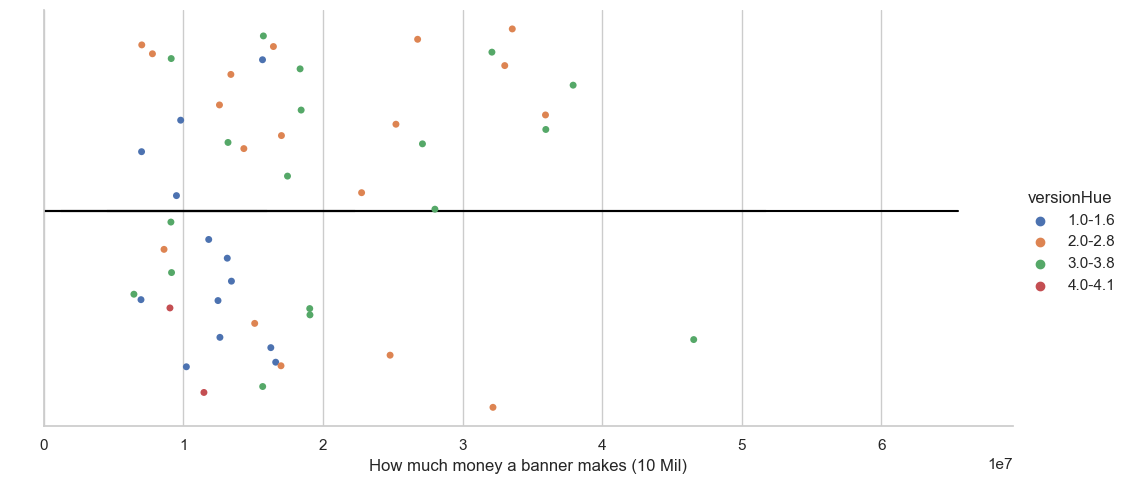

In [12]:
bins = [1.0, 1.6, 2.8, 3.8, 4.1]
labels = ['1.0-1.6', '2.0-2.8', '3.0-3.8', '4.0-4.1']
rev['versionHue'] = pd.cut(rev['version'], bins=bins, labels=labels)
color_palette = {'1.0-1.6': 'red', '2.0-2.8': 'blue', '3.0-3.8': 'green', '4.0-4.1': 'orange'}
sns.set_palette([color_palette.get(version, "gray") for version in labels])
sns.set(style="whitegrid")
catRev = sns.catplot(x="revenue", hue="versionHue", data=rev, aspect=2)
for category in rev['versionHue'].unique():
    sns.kdeplot(rev[rev['versionHue'] == category]['revenue'],color='black', ax=catRev.ax)
plt.xlim(0)
plt.ylabel(' ')
plt.xlabel('How much money a banner makes (10 Mil)')
plt.show()

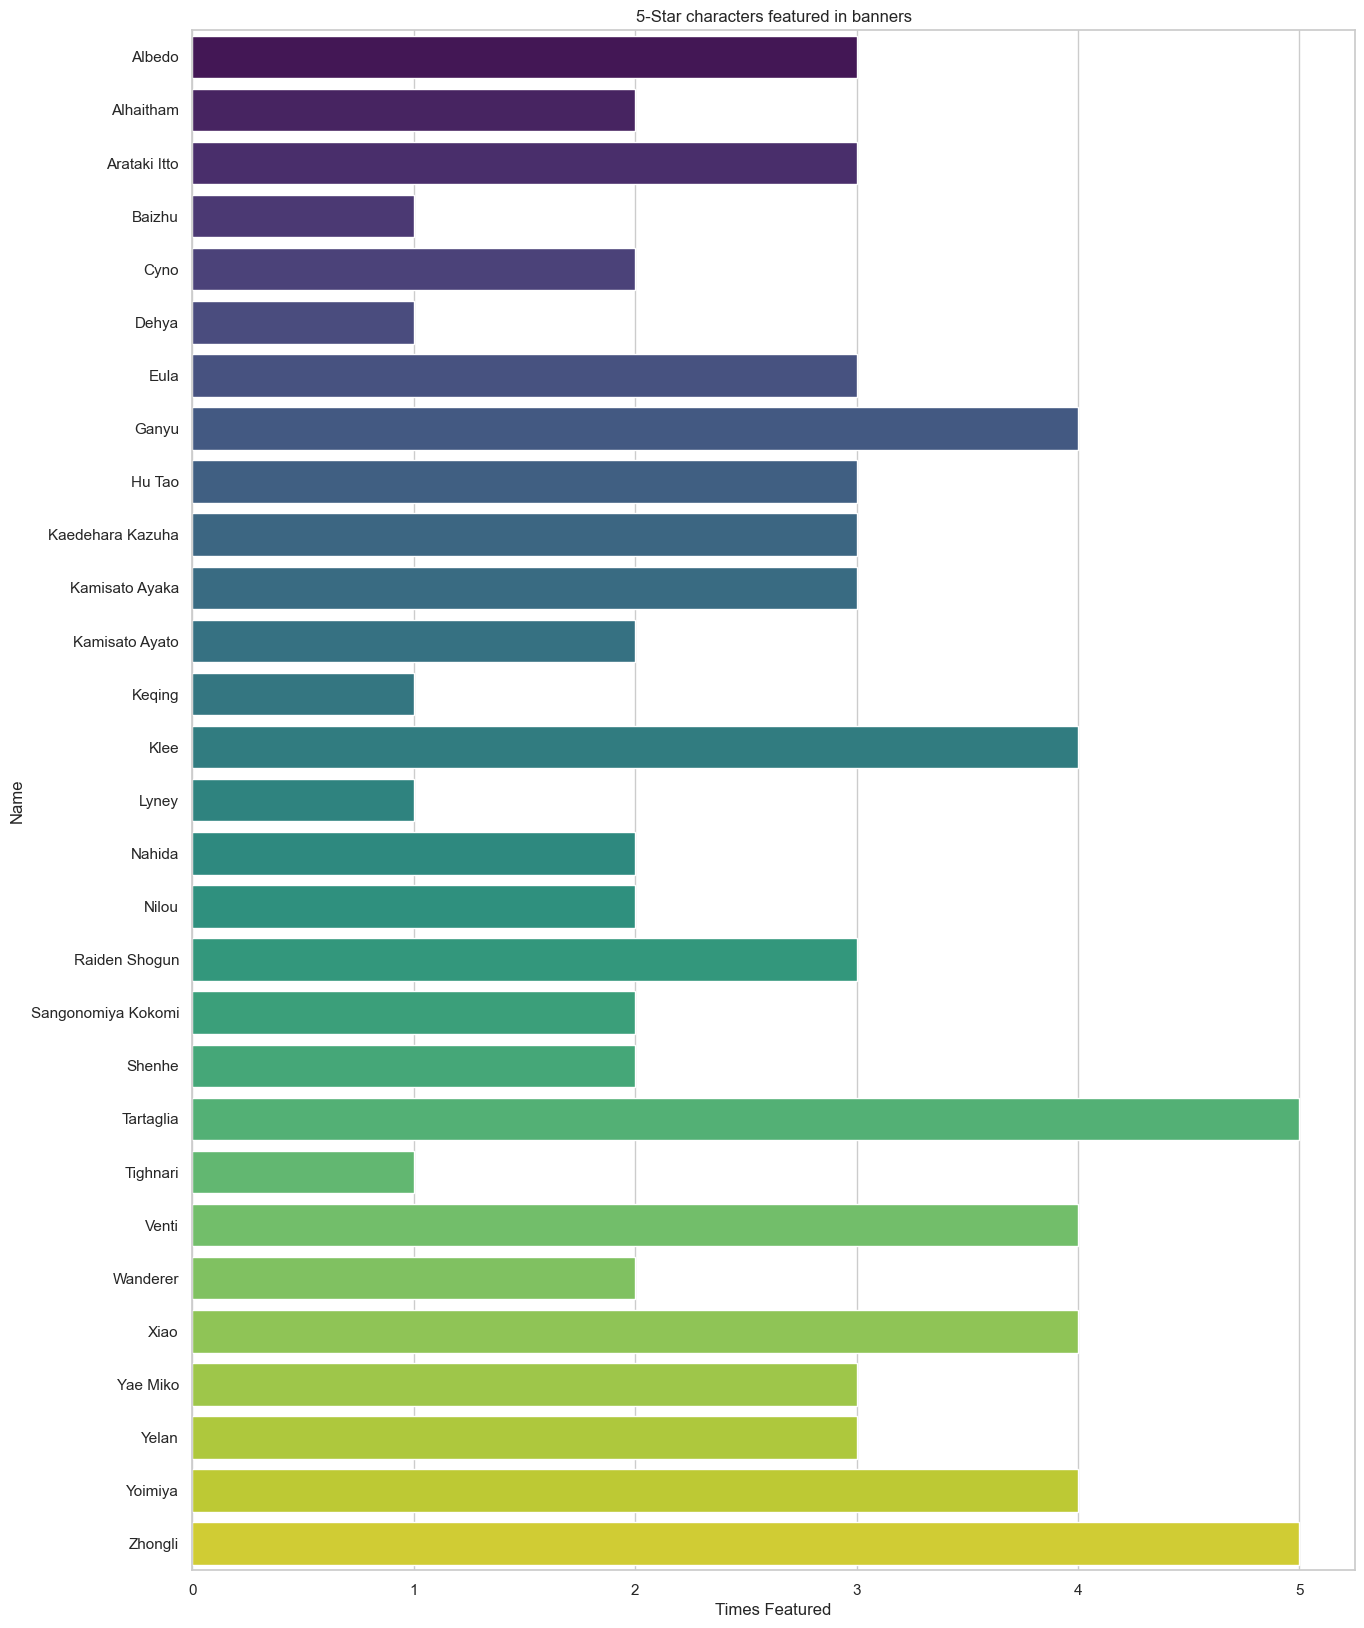

In [13]:
nameCount = {}
for name in five['character_name']:  
    count = rev['5_star_characters'].str.count(name).sum()  
    nameCount[name] = count
count_df = pd.DataFrame({'Name': list(nameCount.keys()), 'Count': list(nameCount.values())})
plt.figure(figsize=(15, 20))
sns.set(style="whitegrid")
sns.barplot(x='Count', y='Name', data=count_df, palette='viridis')
plt.xlabel('Times Featured')
plt.ylabel('Name')
plt.title('5-Star characters featured in banners')
plt.show()

In [14]:
mode_count = count_df['Count'].mode().values[0]

print(f"The mode count of mentions is {mode_count}.")

The mode count of mentions is 3.


In [15]:
max_count = count_df['Count'].max()


top_characters = count_df[count_df['Count'] == max_count]

if len(top_characters) == 1:
    character_with_most_mentions = top_characters['Name'].values[0]
    print(f"The character with the most mentions is '{character_with_most_mentions}' with {max_count} mentions.")
else:
    character_list = ', '.join(top_characters['Name'].values)
    print(f"There is a tie between {character_list}, being featured {max_count} times in a 5-star feature banner")


There is a tie between Tartaglia, Zhongli, being featured 5 times in a 5-star feature banner


<Axes: xlabel='avg', ylabel='CharacterName'>

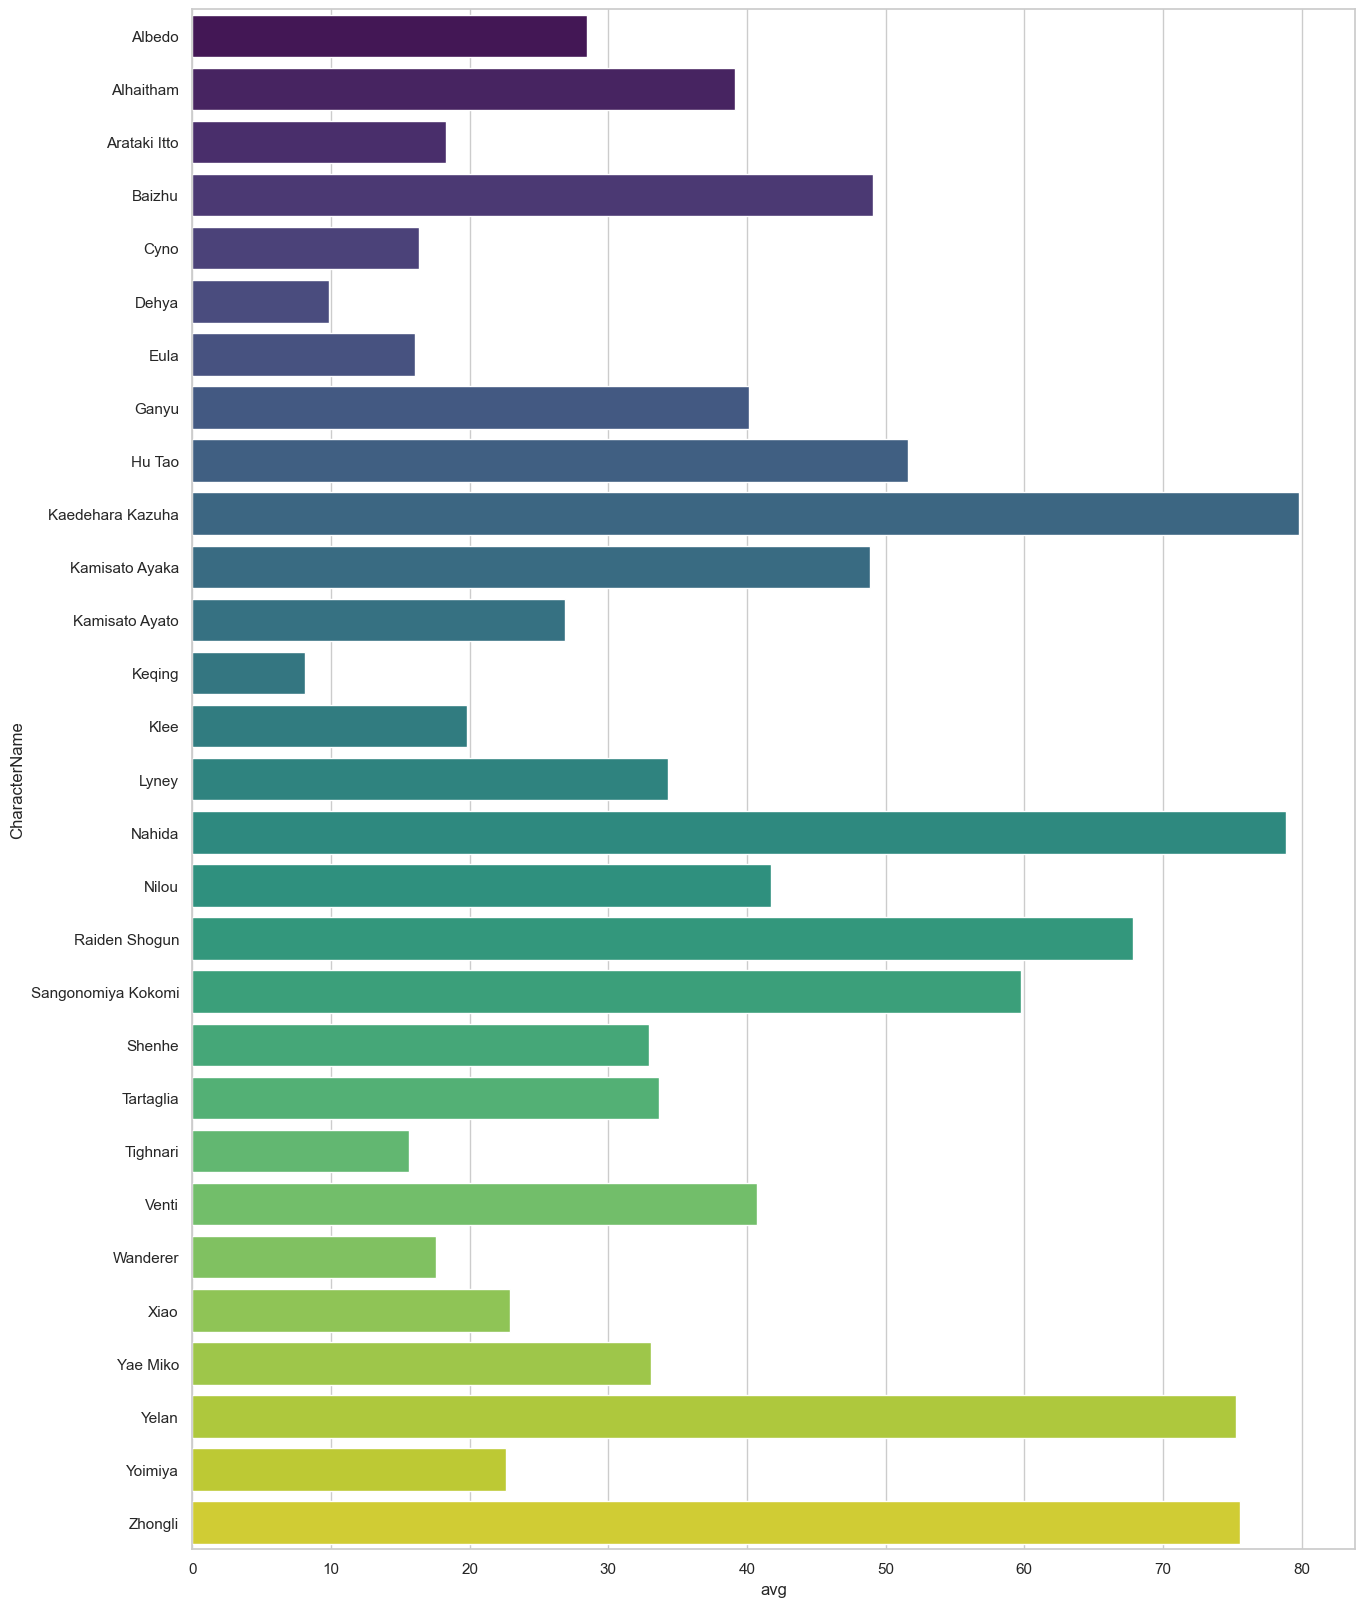

In [16]:
plt.figure(figsize=(15, 20))
sns.barplot(x=ab["avg"], y=ab["CharacterName"], data=count_df, palette='viridis')

<Axes: xlabel='avg'>

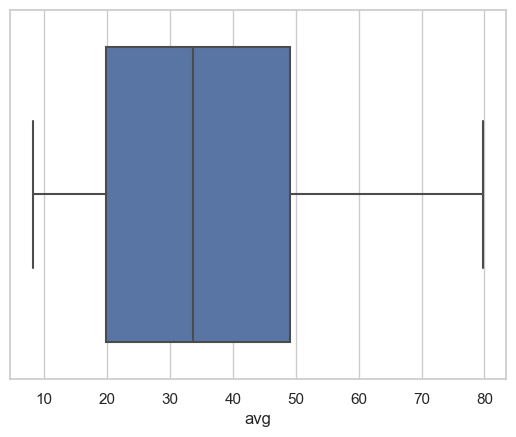

In [18]:
sns.boxplot(x=ab["avg"],data=count_df)